In [5]:
%matplotlib inline
'''This code loads the Fillipazo and Photometry tables and plots data after running a principle component analysis'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PCA_adjustColumns import adjustFili, adjustPhoto
from PCA_merge import merge
from PCA_calc import distance, dm
#from PCA_index import index
from PCA_remName import remName
from PCA_impute import impute
from PCA_scale import scale
from PCA import perform
from PCA_plot import plot_PCA
from PCA_vectors import vectors
from PCA_color import colorColumns

#load Fili Table
fili = pd.read_csv('Fili15 Table9.csv', delimiter=',')
#load Photometry Table
photo = pd.read_csv('photometry_198.csv', delimiter=',')

#adjust tables 
newfili=adjustFili(fili)
newphoto=adjustPhoto(photo)

#merge tables into one table without duplicate columns
fiPh=merge(newfili, newphoto)

#calculate distance
distance=distance(fiPh)

#return table with distance modulus accounted for  
dm=dm(distance)

newcolumns=newphoto.columns.tolist()
for elem in newcolumns:
    if elem=='shortname':
        continue
    fiPh[elem]=fiPh[elem]-dm

#remove shortname and age columns
newfiPh=remName(fiPh)

#create color columns
BDdict = {'J' : 1.24, 'H' : 1.66, 'K' : 2.19, 'Ks' : 2.16, 'W1' : 3.35, 'W2' : 4.6, 'W3' : 11.56, 'W4' : 22.09, '[3.6]' : 3.51, '[4.5]' : 4.44, '[5.8]' : 5.63, '[8]' : 7.59, 'g' : .48, 'i' : .76, 'r' : .62, 'u' : .35, 'z' : .91 }
newfiPh=colorColumns(newfiPh, BDdict)

#impute data
data_imputed=impute(newfiPh)

#scale data
data_scaled=scale(data_imputed)

#fit PCA (data_scaled, # of components)
pca=perform(data_scaled, 5)

#transform PCA
data_PCA=pca.transform(data_scaled)
data_PCA=pd.DataFrame(data_PCA)

#graph and save (x, y, z(or color), data_scaled, factor, pca, loadings (1/0), save(1/0))
#plot_PCA(data_PCA[0], data_PCA[1], fiPh.Gravity, data_scaled, 0, pca,0, 0)
#plt.savefig('/Users/Owner/Summer_Research/graphs/HW2_PCA0_Gravity.png')

len(newfiPh.columns.tolist())


159

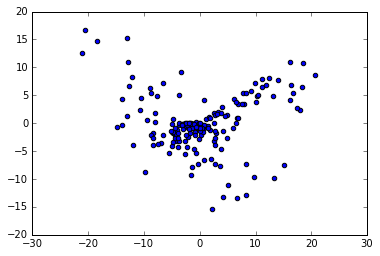

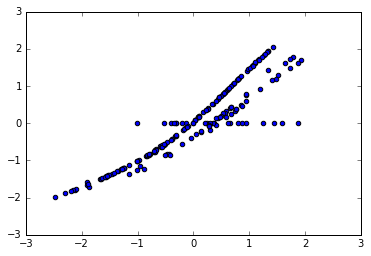